# Shakespeare dataset

In [3]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-02-01 09:42:20--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2025-02-01 09:42:20 (24.5 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [4]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [5]:
text[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [10]:
len(text)

1115394

In [6]:
characters = set()
for c in text:
    characters.add(c)

In [12]:
len(characters)

65

In [7]:
int_to_characters = {i: c for i, c in enumerate(characters)}
characters_to_int = {c: i for i, c in enumerate(characters)}

In [8]:
[characters_to_int[c] for c in "hello world"]

[7, 49, 44, 44, 57, 26, 35, 57, 13, 44, 40]

In [146]:
CONTEXT_WINDOW = 20

In [147]:
X, y = [], []

In [148]:
k = 0
for k in range(len(text) - 70):
    xx = text[k:k+CONTEXT_WINDOW]
    yy = text[k+CONTEXT_WINDOW]

    X.append([characters_to_int[c] for c in xx])
    y.append(characters_to_int[yy])

In [149]:
X_train, X_test, y_train, y_test = [], [], [], []
import random

for i in range(len(X)):
    if random.random() < 0.01:
        X_test.append(X[i])
        y_test.append(y[i])
    else:
        X_train.append(X[i])
        y_train.append(y[i])


In [150]:
len(X_train), len(X_train[0]), X_train[0], len(y_train), y_train[0]

(1104122,
 20,
 [23, 59, 13, 64, 0, 26, 63, 59, 0, 59, 54, 49, 28, 36, 12, 5, 49, 3, 57, 13],
 1104122,
 49)

# MLP model

multi label classification supervised task with 65 labels

In [ ]:
# https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [ ]:
! pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 58.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [14]:
import torch

In [151]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom Dataset class
class SimpleDataset(Dataset):
    def __init__(self, x_data, y_data):
        # Convert to tensors
        self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.y_data = torch.tensor(y_data, dtype=torch.long)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

# Create dataset and DataLoader
train_dataloader = DataLoader(SimpleDataset(X_train, y_train), batch_size=512, shuffle=True, num_workers=2, pin_memory=True)
test_dataloader = DataLoader(SimpleDataset(X_test, y_test), batch_size=512, shuffle=True, num_workers=2, pin_memory=True)

# Iterate over the DataLoader
for batch_idx, (features, labels) in enumerate(train_dataloader):
    print(f"Batch {batch_idx + 1}:")
    print("Features:\n", features)
    print("Labels:\n", labels)
    break  # Just to show the first batch for demonstration


Batch 1:
Features:
 tensor([[ 3., 14., 12.,  ..., 64., 34., 59.],
        [51., 26., 42.,  ..., 57., 17., 44.],
        [10., 26.,  0.,  ...,  0.,  7., 59.],
        ...,
        [59., 28., 55.,  ...,  7., 49., 26.],
        [57., 57., 28.,  ...,  7., 26., 40.],
        [57., 17., 44.,  ..., 49., 49., 26.]])
Labels:
 tensor([13, 40, 28, 49, 60,  7, 37, 49, 26, 59, 24, 13, 49, 40, 57, 57,  6,  3,
         0, 26,  6, 12, 18, 41, 49,  7, 64, 26, 57,  0, 49, 28, 31,  6,  8, 35,
        18, 13,  8, 35,  0, 14, 49, 57, 42, 26,  0, 35, 26, 35, 51, 57, 26, 57,
        26,  7, 14, 28, 26, 27, 55,  3,  0,  0, 57, 64,  6,  0, 49, 11, 20, 40,
        40, 12, 64,  7, 26,  0, 13,  6, 35, 57, 34, 26, 14, 26, 49, 13, 64,  7,
        11, 26, 59, 12, 34, 26, 26,  0,  6, 36, 26, 59,  9, 26, 49, 57, 42, 59,
        29,  3, 34, 64, 19, 49, 26, 26, 49, 64, 59,  7, 49, 26, 26, 28, 35, 26,
        13, 49, 26, 44, 64, 57,  7, 59,  7, 26, 27, 49,  3,  6, 35, 36, 59, 56,
        59, 49, 34, 40, 59,  0, 17, 28,  

In [105]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([512, 64])
Shape of y: torch.Size([512]) torch.int64


In [106]:
for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([512, 64])
Shape of y: torch.Size([512]) torch.int64


In [18]:
import torch

if torch.cuda.is_available():
    device_index = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(device_index)
    capability = torch.cuda.get_device_capability(device_index)
    memory = torch.cuda.get_device_properties(device_index).total_memory / 1e9  # Convert to GB

    print(f"Device Index: {device_index}")
    print(f"Device Name: {device_name}")
    print(f"Compute Capability: {capability[0]}.{capability[1]}")
    print(f"Total Memory: {memory:.2f} GB")
else:
    print("CUDA device not available.")

Device Index: 0
Device Name: Tesla T4
Compute Capability: 7.5
Total Memory: 15.83 GB


In [19]:
print(f"Device being used: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")


Device being used: Tesla T4


In [164]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device name
print(f"Using device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

print(f"Using {device} device")

torch.manual_seed(15)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(15)

import torch.nn as nn

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, 65)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
import torch.nn.init as init

def init_weights_normal(m):
    if isinstance(m, nn.Linear):
        init.normal_(m.weight, mean=0.0, std=0.01)
        if m.bias is not None:
            init.constant_(m.bias, 0)

model = NeuralNetwork().to(device)
model.apply(init_weights_normal)  # or init_weights_uniform
print(model)

Using device: Tesla T4
Using cuda device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2048, out_features=2048, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2048, out_features=65, bias=True)
  )
)


In [167]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.9)

In [162]:
b, xx_y = next(enumerate(train_dataloader))
print(xx_y[0].shape, xx_y[1].shape)
print("".join([int_to_characters[int(i)] for i in xx_y[0][0]]))
print("".join([int_to_characters[int(xx_y[1][0])]]))

torch.Size([512, 20]) torch.Size([512])
him, I said 'twas pi
t


In [165]:
def quick_test(dataloader, model, loss_fn, num_batches_to_test=2):
    model.eval()
    test_loss, correct, total_samples = 0, 0, 0
    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(dataloader):
            if batch_idx >= num_batches_to_test:
                break
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y).item()
            test_loss += loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            total_samples += len(X)
    avg_loss = test_loss / num_batches_to_test
    accuracy = correct / total_samples
    print(f"Quick Test: Accuracy: {accuracy*100:>0.1f}%, Avg loss: {avg_loss:>8f}")

# Use quick_test instead of test to run only a couple of batches.
quick_test(test_dataloader, model, loss_fn, num_batches_to_test=2)


Quick Test: Accuracy: 0.3%, Avg loss: 4.183925


In [132]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            train_losses.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [133]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            _test_loss = loss_fn(pred, y).item()
            test_losses.append(_test_loss)
            test_loss += _test_loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [168]:
epochs = 2
train_losses, test_losses = [], []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4.183852  [  512/1104122]
loss:     nan  [51712/1104122]
loss:     nan  [102912/1104122]
loss:     nan  [154112/1104122]
loss:     nan  [205312/1104122]


KeyboardInterrupt: 

In [64]:
def moving_average(data, window_size=3):
    return [sum(data[i:i+window_size]) / window_size for i in range(len(data) - window_size + 1)]

# Smooth the losses
smoothed_train_losses = moving_average(train_losses, window_size=4)
smoothed_test_losses = moving_average(test_losses, window_size=4)


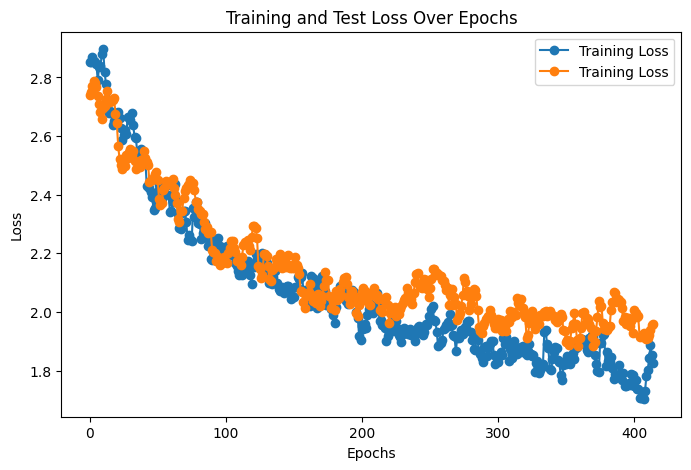

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(smoothed_train_losses, label="Training Loss", marker='o')
plt.plot(smoothed_test_losses, label="Training Loss", marker='o')
#plt.plot(train_losses, label="Training Loss", marker='o')
#plt.plot(test_losses, label="Test Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [140]:
# Define your checkpoint dictionary
checkpoint = {
    'epoch': 10,                           # current epoch number
    'model_state_dict': model.state_dict(),   # model parameters
    'optimizer_state_dict': optimizer.state_dict(),  # optimizer parameters
    'loss': 2.190298,                             # latest loss value (optional)
    # You can add any additional info you want here
}

# Save the checkpoint to a file
torch.save(checkpoint, 'model_checkpoint_1.pth')
print("Checkpoint saved!")

Checkpoint saved!


In [2]:
# Define your checkpoint dictionary
start_checkpoint = {
    'epoch': 10,                           # current epoch number
    'model_state_dict': model.state_dict(),   # model parameters
    'optimizer_state_dict': optimizer.state_dict(),  # optimizer parameters
    'loss': 4.195235,                             # latest loss value (optional)
    # You can add any additional info you want here
}

# Save the checkpoint to a file
torch.save(start_checkpoint, 'model_checkpoint_1.pth')
print("Checkpoint saved!")

NameError: name 'model' is not defined

In [ ]:
# Instantiate the model and move it to the device
model = NeuralNetwork().to(device)

# Load the checkpoint
checkpoint = torch.load('model_checkpoint_1.pth', map_location=device)

# Load the saved state_dict into your model
model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode (important for inference!)
model.eval()

In [66]:
import torch

# Number of classes (assuming 65 output classes)
num_classes = 65

# Dictionaries to keep track of correct predictions and total samples per class
per_class_correct = {i: 0 for i in range(num_classes)}
per_class_total = {i: 0 for i in range(num_classes)}

# Make sure the model is in evaluation mode
model.eval()
with torch.no_grad():
    # Loop over the test DataLoader
    for X, y in test_dataloader:
        # Move data to the device (GPU or CPU)
        X, y = X.to(device), y.to(device)

        # Get model outputs (logits)
        outputs = model(X)

        # Get predicted classes
        preds = outputs.argmax(dim=1)

        # For each class, update correct and total counts
        for cls in range(num_classes):
            # Create a mask for samples belonging to the current class
            mask = (y == cls)
            per_class_total[cls] += mask.sum().item()
            if mask.sum().item() > 0:  # Only update if there are samples for this class
                per_class_correct[cls] += (preds[mask] == y[mask]).sum().item()

# Calculate accuracy per class
accuracy_per_class = {}
for cls in range(num_classes):
    if per_class_total[cls] > 0:
        accuracy_per_class[cls] = per_class_correct[cls] / per_class_total[cls]
    else:
        accuracy_per_class[cls] = None  # No samples for this class

# Display the per-class accuracy
for cls, acc in accuracy_per_class.items():
    if acc is not None:
        print(f"Class {cls}: Accuracy = {acc*100:.2f}%")
    else:
        print(f"Class {cls}: No samples available.")


Class 0: Accuracy = 55.17%
Class 1: Accuracy = 0.00%
Class 2: Accuracy = 73.33%
Class 3: Accuracy = 17.39%
Class 4: Accuracy = 0.00%
Class 5: Accuracy = 12.00%
Class 6: Accuracy = 24.76%
Class 7: Accuracy = 51.82%
Class 8: Accuracy = 61.02%
Class 9: Accuracy = 26.83%
Class 10: Accuracy = 12.50%
Class 11: Accuracy = 37.27%
Class 12: Accuracy = 52.82%
Class 13: Accuracy = 45.70%
Class 14: Accuracy = 11.46%
Class 15: Accuracy = 57.14%
Class 16: Accuracy = 54.35%
Class 17: Accuracy = 30.69%
Class 18: Accuracy = 0.00%
Class 19: Accuracy = 0.00%
Class 20: Accuracy = 37.33%
Class 21: Accuracy = 0.00%
Class 22: Accuracy = 100.00%
Class 23: Accuracy = 37.50%
Class 24: Accuracy = 68.42%
Class 25: No samples available.
Class 26: Accuracy = 80.48%
Class 27: Accuracy = 0.00%
Class 28: Accuracy = 43.98%
Class 29: Accuracy = 0.00%
Class 30: Accuracy = 53.85%
Class 31: Accuracy = 1.54%
Class 32: Accuracy = 38.78%
Class 33: Accuracy = 38.24%
Class 34: Accuracy = 12.90%
Class 35: Accuracy = 14.14%
Class

In [67]:
accuracy_dict = {}
for idx, acc in accuracy_per_class.items():
    char = int_to_characters[idx]
    accuracy_dict[char] = acc * 100 if acc else 0  # convert to percentage

In [68]:
import pandas as pd
df = pd.DataFrame(list(accuracy_dict.items()), columns=['Character', 'Accuracy'])
# Sort the DataFrame alphabetically by character
df = df.sort_values('Character')

In [45]:
epoch_1_df = df.copy()

In [53]:
epoch_5_df = df.copy()

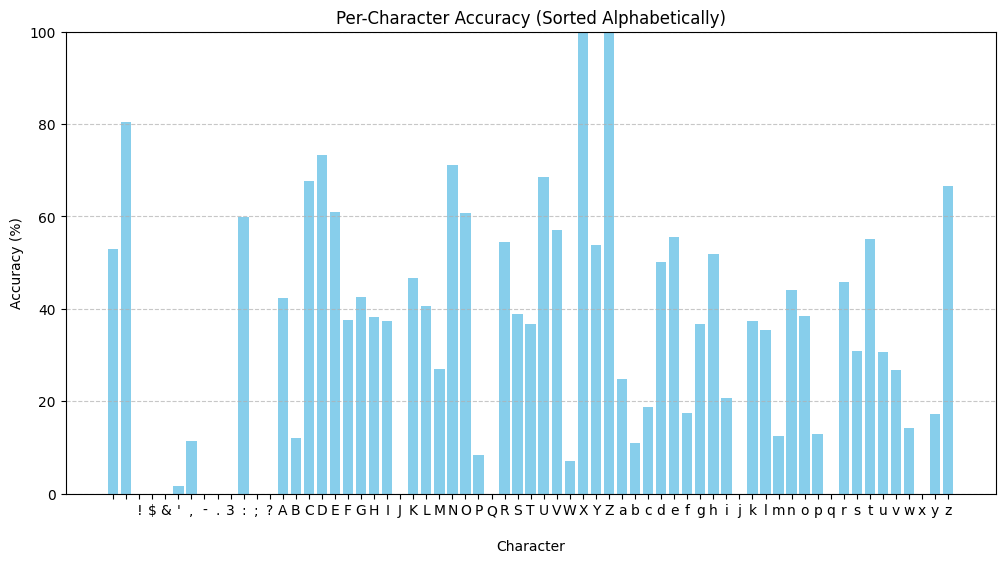

In [69]:
plt.figure(figsize=(12, 6))
plt.bar(df['Character'], df['Accuracy'], color='skyblue')
plt.xlabel('Character')
plt.ylabel('Accuracy (%)')
plt.title('Per-Character Accuracy (Sorted Alphabetically)')
plt.ylim(0, 100)  # Assuming accuracy is between 0% and 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [96]:
running_text = text[479:489]
print(running_text)

We are acc


In [97]:
for k in range(100):
  print(running_text)
  input_text = running_text[-10:]
  input_indices = [characters_to_int[c] for c in input_text]
  input_tensor = torch.tensor(input_indices, dtype=torch.float32, device=device)
  input_tensor = input_tensor.unsqueeze(0)

  # Put the model in evaluation mode and disable gradient computation
  model.eval()
  with torch.no_grad():
    # Get the output logits from the model
    output_logits = model(input_tensor)

  # Get the index of the predicted character (assuming your model outputs logits for 65 classes)
  predicted_index = output_logits.argmax(dim=1).item()

  # Map the predicted index back to a character
  predicted_char = int_to_characters[predicted_index]
  running_text += predicted_char


We are acc
We are acc 
We are acc  
We are acc  o
We are acc  on
We are acc  on 
We are acc  on t
We are acc  on th
We are acc  on the
We are acc  on the 
We are acc  on the m
We are acc  on the mi
We are acc  on the min
We are acc  on the mind
We are acc  on the mind,
We are acc  on the mind, 
We are acc  on the mind, t
We are acc  on the mind, th
We are acc  on the mind, tha
We are acc  on the mind, that
We are acc  on the mind, that 
We are acc  on the mind, that w
We are acc  on the mind, that w 
We are acc  on the mind, that w r
We are acc  on the mind, that w rh
We are acc  on the mind, that w rho
We are acc  on the mind, that w rhos
We are acc  on the mind, that w rhose
We are acc  on the mind, that w rhosed
We are acc  on the mind, that w rhosedf
We are acc  on the mind, that w rhosedf 
We are acc  on the mind, that w rhosedf a
We are acc  on the mind, that w rhosedf an
We are acc  on the mind, that w rhosedf and
We are acc  on the mind, that w rhosedf and 
We are acc  on the m

In [79]:
predicted_char

'z'